<a href="https://colab.research.google.com/github/codingbjs/DeepLearning/blob/main/Convolutional_Neural_Network_CNN/CNN_Dogs_and_Cats_VGG16_Fine_Tuning_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.13.0'

In [3]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/dogs_and_cats_small.zip

--2023-10-16 01:36:42--  https://raw.githubusercontent.com/rusita-ai/pyData/master/dogs_and_cats_small.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90618980 (86M) [application/zip]
Saving to: ‘dogs_and_cats_small.zip’

dogs_and_cats_small 100%[===================>]  86.42M   322MB/s    in 0.3s    

2023-10-16 01:36:42 (322 MB/s) - ‘dogs_and_cats_small.zip’ saved [90618980/90618980]



In [4]:
!ls -l

total 88504
-rw-r--r-- 1 root root 90618980 Oct 16 01:36 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Oct 12 13:25 sample_data


In [5]:
!unzip -q /content/dogs_and_cats_small.zip

In [6]:
!ls -l

total 88516
-rw-r--r-- 1 root root 90618980 Oct 16 01:36 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Oct 12 13:25 sample_data
drwxr-xr-x 4 root root     4096 Oct 16 01:37 test
drwxr-xr-x 4 root root     4096 Oct 16 01:37 train
drwxr-xr-x 4 root root     4096 Oct 16 01:37 validation


In [7]:
train_dir = '/content/train'
valid_dir = '/content/validation'
test_dir = '/content/test'

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   brightness_range = [0.5, 1.5],
                                   fill_mode = 'nearest'
                                   )

# Without Augmentation
valid_datagen = ImageDataGenerator(rescale = 1./255)


# With Augmentation
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

# Without Augmentation
valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [10]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [11]:
print('conv_base 동결 전 훈련 가능 가중치의 종류 : ', len(conv_base.trainable_weights))

conv_base 동결 전 훈련 가능 가중치의 종류 :  26


In [12]:
conv_base.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [13]:
conv_base.layers

In [14]:
conv_base.layers[-4].name

'block5_conv1'

In [15]:
conv_base.layers[-4].weights

[<tf.Variable 'block5_conv1/kernel:0' shape=(3, 3, 512, 512) dtype=float32, numpy=
 array([[[[-6.0689339e-04,  1.4231558e-03,  7.3316055e-03, ...,
            2.6178278e-03,  4.3357504e-04, -2.9434897e-03],
          [-4.8605306e-03,  4.9075234e-04, -1.2511463e-03, ...,
            1.1560039e-03, -1.2683710e-04, -1.5934335e-02],
          [ 8.2136225e-03,  7.4967248e-03,  4.4443067e-03, ...,
           -1.0573096e-02, -1.3803735e-02, -2.0028956e-03],
          ...,
          [ 2.0234480e-03, -5.8380342e-03, -2.3825851e-03, ...,
            1.3192679e-03, -8.6920448e-03, -8.2156417e-04],
          [ 7.9414165e-03, -8.0086980e-03,  7.7348115e-04, ...,
            9.1014095e-03,  6.8836473e-04, -9.8630879e-03],
          [ 7.3094536e-03, -1.1607672e-03,  5.1686643e-03, ...,
           -1.8046533e-03, -7.7111748e-05,  3.5778836e-03]],
 
         [[-1.5249068e-03, -3.1574788e-03,  4.5571220e-03, ...,
           -8.1634670e-03, -8.1500728e-03, -5.8323247e-03],
          [-1.2195857e-03, -5.4

In [16]:
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [17]:
print('conv_base 동결 후 훈련 가능 가중치의 종류 : ', len(conv_base.trainable_weights))

conv_base 동결 후 훈련 가능 가중치의 종류 :  6


In [18]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [19]:
from tensorflow.keras import models, layers

model = models.Sequential(name='CNN_VGG16')
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(255, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [20]:
model.summary()

Model: "CNN_VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 255)               2089215   
                                                                 
 dense_1 (Dense)             (None, 1)                 256       
                                                                 
Total params: 16804159 (64.10 MB)
Trainable params: 9168895 (34.98 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [22]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(learning_rate=0.000005),
              metrics = ['accuracy'])

In [23]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 30,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 35s 229ms/step - loss: 0.7468 - accuracy: 0.5260 - val_loss: 0.6713 - val_accuracy: 0.5350
Epoch 2/30
100/100 [==============================] - 21s 205ms/step - loss: 0.6906 - accuracy: 0.5610 - val_loss: 0.6097 - val_accuracy: 0.6520
Epoch 3/30
100/100 [==============================] - 21s 212ms/step - loss: 0.6472 - accuracy: 0.6010 - val_loss: 0.5416 - val_accuracy: 0.7130
Epoch 4/30
100/100 [==============================] - 20s 201ms/step - loss: 0.5792 - accuracy: 0.6900 - val_loss: 0.4823 - val_accuracy: 0.7640
Epoch 5/30
100/100 [==============================] - 24s 240ms/step - loss: 0.5425 - accuracy: 0.7135 - val_loss: 0.3873 - val_accuracy: 0.8440
Epoch 6/30
100/100 [==============================] - 23s 227ms/step - loss: 0.5054 - accuracy: 0.7580 - val_loss: 0.3529 - val_accuracy: 0.8530
Epoch 7/30
100/100 [==============================] - 22s 225ms/step - loss: 0.4599 - accuracy: 0.7760 - val_loss: 0.3085 - val_ac

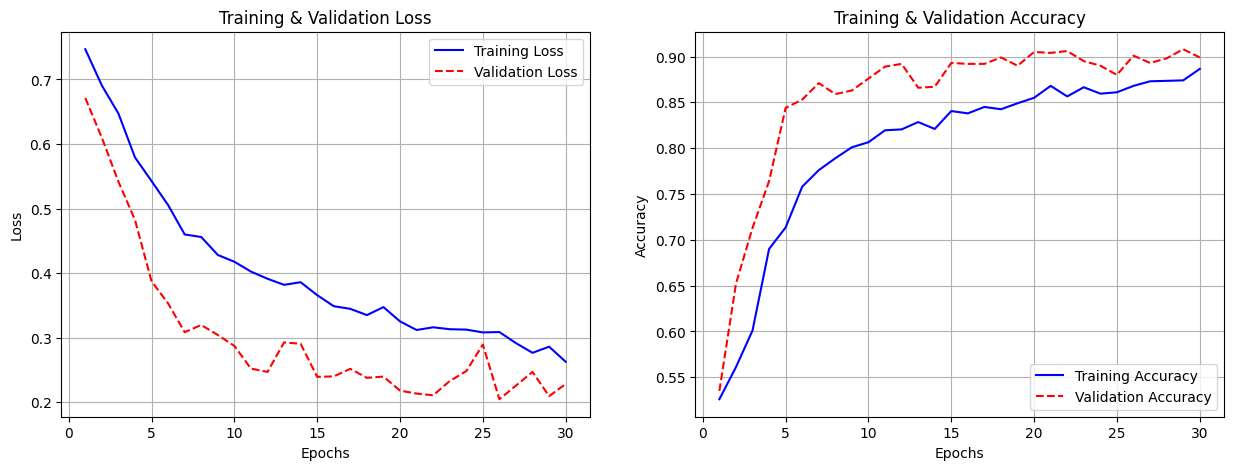

In [24]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_dandc.history['loss'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_dandc.history['accuracy'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [25]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [26]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50,
                                verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.27244
Accuracy = 0.89500
